In [3]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

# data = pd.read_csv("./data/whole_data.csv")
data = pd.read_csv("./data/train_data.csv")
data = data.iloc[:, 1:]
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,time,event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1


In [10]:
# data = data.drop(data[np.where(data.time == 0)[0].tolist()])
data = data.drop(np.where(data.time == 0)[0].tolist())
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,time,event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,0.50,0.99,0.61,0.88,0.68,0.34,0.96,1.00,0.19,0.80,0.14,0.29,0.41,0.40,0.73,0.76,0.01,1,4.77,1
662,0.62,0.19,0.51,0.30,0.12,0.10,0.41,0.25,0.17,0.17,0.73,0.20,0.18,0.10,0.19,0.39,0.17,1,0.03,1
663,0.84,0.30,0.99,0.55,0.83,0.98,0.17,0.33,0.83,0.45,0.68,0.51,0.57,0.46,0.71,0.29,0.37,0,3.60,1
664,0.94,0.83,0.37,0.69,0.92,0.62,0.39,0.41,0.20,0.74,0.60,0.46,0.21,0.06,0.23,0.93,0.26,0,6.52,1


In [11]:
# X = data.iloc[:, :18]
X = data.iloc[:, [0, 2, 3, 4, 6, 7, 9, 10, 13, 14, 15]]
y = data.iloc[:, 18]

X_train, X_val, y_train, y_val = train_test_split(X, np.log(y), test_size=0.2)

X_train = X_train.to_numpy()
X_val   = X_val.to_numpy()

y_train = y_train.to_numpy().reshape(-1, 1)
y_val   = y_val.to_numpy().reshape(-1, 1)

In [25]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

regressor = TabNetRegressor(n_d=10,
                            n_a=10,
                            n_steps=10)

regressor.fit(X_train, y_train, X_val, y_val, patience=50)
pred = regressor.predict(X_val)

Device used : cpu
Will train until validation stopping metric hasn't improved in 50 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | -20.58785 |  -4.22248 |   0.3       
| 2     | -12.20505 |  -2.87539 |   0.5       
| 3     | -6.58158 |  -3.05016 |   0.7       
| 4     | -4.88313 |  -3.17845 |   0.8       
| 5     | -4.34532 |  -3.19172 |   1.0       
| 6     | -4.41156 |  -2.95285 |   1.2       
| 7     | -4.18314 |  -2.81095 |   1.4       
| 8     | -3.44924 |  -2.59566 |   1.6       
| 9     | -2.76363 |  -2.48932 |   1.8       
| 10    | -2.66215 |  -2.47723 |   2.0       
| 11    | -2.29466 |  -2.50553 |   2.1       
| 12    | -2.40234 |  -2.33084 |   2.3       
| 13    | -2.22754 |  -2.23228 |   2.5       
| 14    | -2.15008 |  -2.29013 |   2.7       
| 15    | -2.03608 |  -2.31023 |   2.9       
| 16    | -2.31830 |  -2.40503 |   3.0       
| 17    | -2.27363 |  -2.43556 |   3.2       
| 18    | -1.98831 |  -2.40405 |   3.4

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, pred.round(0))

2.68990080295155

In [68]:
test_data = pd.read_csv('./data/testX.csv')
test_data = test_data.iloc[:, 1:]

pred = clf.predict(test_data.to_numpy())

In [69]:
result = pd.DataFrame(zip(list(range(287)), map(int, pred.tolist())), columns=['Title', 'action'])
result.to_csv('./result/tabnet_result.csv', index=False)
result

,Title,action
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
281,281,1
282,282,0
283,283,0
284,284,0


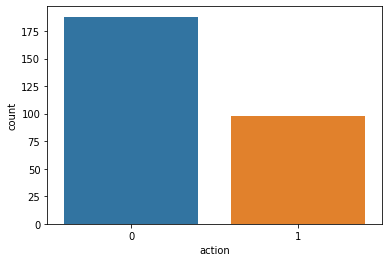

In [70]:
import seaborn as sns

sns.countplot(result.action)

In [77]:
np.sum(result.action == 1) / len(result.action) * 100

34.26573426573427

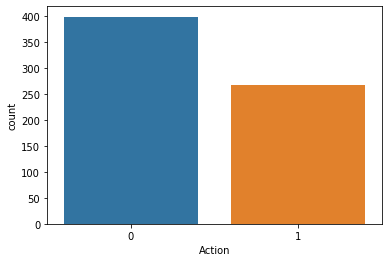

In [72]:
sns.countplot(data.Action)

In [76]:
import numpy as np

np.sum(data.Action == 1) / len(data.Action) * 100

40.090090090090094